# Datasets de burbujas
El datasets cuenta con un total de 553 imágenes.
## 1- Preprosecamiento de las imágenes con match_histogram
Existen unas pocas imágenes las cuáles se encuentran en diferencia con respecto a las demás por su histograma de colores que presentan. Dado este problema se procede a realizar un march_histogram para así lograr tener todas las imágenes en un histograma de colores similares.

**Ejemplos de imagen en el datasets**
<table>
    <tr>
        <td>
            <img src="images/Nacozari 220420150955/1.png" style="width: 75%;height: 75%">
        </td>
        <td>
            <img src="images/Nacozari 220420150955/10.png" style="width: 75%;height: 75%">
        </td>
        <td>
            <img src="images/Nacozari 220420150955/20.png" style="width: 75%;height: 75%">
        </td>
        <td>
            <img src="reference.png" style="width: 75%;height: 75%">
        </td>
    </tr>
</table>

A continuación, se hace uso del módulo skimage.exposure.match_histogram 


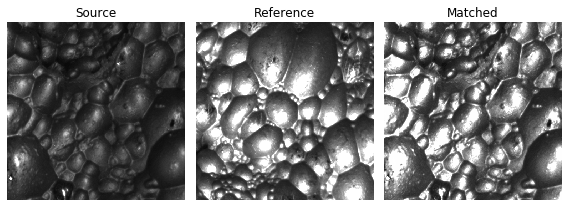

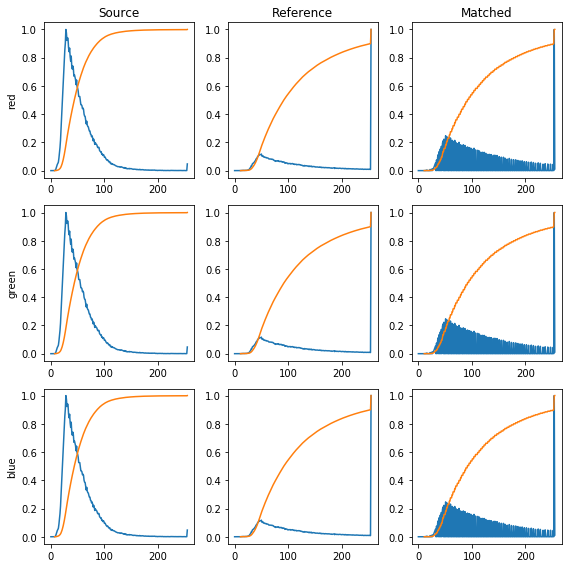

In [9]:
import matplotlib.pyplot as plt

from skimage.exposure import match_histograms
from skimage.io import imread, imread_collection, imsave

#path 
col_dir = 'images/Nacozari 220420150955/*.png'

#creating a collection with the available images
collection = imread_collection(col_dir)
#reference
reference = imread('reference.png')
i = 1
for col in collection:
    matched = match_histograms(col, reference, multichannel=True)
    imsave('images/Nacozari 220420150955_2/{}.png'.format(i),matched)
    i+=1

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(collection[0])
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
matched = match_histograms(collection[0], reference, multichannel=True)
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))


for i, img in enumerate((collection[0], reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()

## 2- Aplicando PCA 2D

explained variance ratio (first two components): [0.05037483 0.02016518]


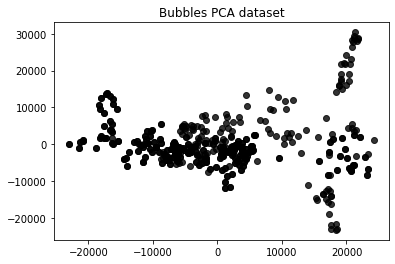

In [6]:
import numpy as np
from sklearn.decomposition import PCA

#path 
col_dir = 'images/*.png'

#creating a collection with the available images
collection = imread_collection(col_dir)

X = [np.ravel(col)for col in collection] 

pca = PCA(n_components=2)
X_fit = pca.fit(X)
X_r = pca.transform(X)

#fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
#ax1.set_axis_off()
#for i, ax in enumerate(axes.flat):
#    ax.imshow(np.reshape(X_fit.components_[i], (499, 499, 3)),cmap='gray')
#ax1.imshow(np.reshape(X_fit.components_[0], (-1, 499, 3)))
    
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()

plt.scatter(X_r[:, 0], X_r[:, 1], c='black', alpha=.8)
plt.title('Bubbles PCA dataset')

plt.show()

## 3- Aplicando T-SNE 2D

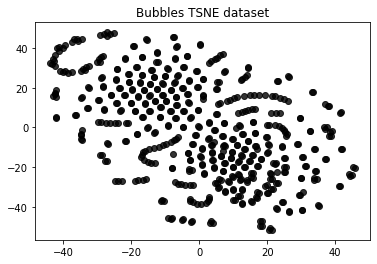

In [7]:
from sklearn.manifold import TSNE

#path 
col_dir = 'images/*.png'

#creating a collection with the available images
collection = imread_collection(col_dir)

X = [np.ravel(col)for col in collection] 

tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

plt.figure()

plt.scatter(X_2d[:, 0], X_2d[:, 1], c='black', alpha=.8)
plt.title('Bubbles TSNE dataset')

plt.show()